In [4]:
import pandas as pd

In [36]:
df_initial = pd.read_csv('../Dataset/abu_dhabi.csv')  # Change to your filename
df = pd.read_csv('../Dataset/abu_dhabi.csv')  # Change to your filename
df_weather=pd.read_csv('../Dataset/weather_abu_dhabi.csv')

In [37]:
df_initial

,lat,lng,pop
0,24.625833,54.700833,20.4275
1,24.625833,54.701666,21.9988
2,24.625833,54.702500,23.9676
3,24.625000,54.660833,20.3940
4,24.625000,54.661666,19.3696
...,...,...,...
37335,24.190833,54.472500,17.7273
37336,24.190833,54.674166,14.5937
37337,24.190000,54.471666,16.7833
37338,24.190000,54.472500,16.7759


In [78]:
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
    'cadetblue', 'darkpurple', 'pink', 'gray', 'black'
]

In [26]:
# Define a function to truncate (cut) after 2 decimal places
def truncate(x):
    return int(x * 100) / 100

# Apply truncation
df['lat'] = df['lat'].apply(truncate)
df['lng'] = df['lng'].apply(truncate)

In [27]:
df

,lat,lng,pop
0,24.62,54.70,20.4275
1,24.62,54.70,21.9988
2,24.62,54.70,23.9676
3,24.62,54.66,20.3940
4,24.62,54.66,19.3696
...,...,...,...
37335,24.19,54.47,17.7273
37336,24.19,54.67,14.5937
37337,24.19,54.47,16.7833
37338,24.19,54.47,16.7759


In [29]:
df_weather = df_weather.drop(columns=["Unnamed: 0"])

In [30]:
df_weather

,lat,lng,avg_temp_18
0,24.62,54.66,26.030836
1,24.62,54.69,25.683830
2,24.62,54.59,26.037336
3,24.62,54.58,26.043837
4,24.62,54.68,26.011335
...,...,...,...
1930,24.19,54.53,27.350668
1931,24.19,54.57,27.370167
1932,24.19,54.54,27.402668
1933,24.19,54.25,26.604000


In [31]:
merged_df = df.merge(
    df_weather,
    on=['lat', 'lng'],
    how='left'
)


In [32]:
merged_df

,lat,lng,pop,avg_temp_18
0,24.62,54.70,20.4275,NaN
1,24.62,54.70,21.9988,NaN
2,24.62,54.70,23.9676,NaN
3,24.62,54.66,20.3940,26.030836
4,24.62,54.66,19.3696,26.030836
...,...,...,...,...
37335,24.19,54.47,17.7273,27.170332
37336,24.19,54.67,14.5937,27.253666
37337,24.19,54.47,16.7833,27.170332
37338,24.19,54.47,16.7759,27.170332


In [33]:
merged_df = merged_df.dropna(subset=['avg_temp_18'])

In [34]:
merged_df

,lat,lng,pop,avg_temp_18
3,24.62,54.66,20.3940,26.030836
4,24.62,54.66,19.3696,26.030836
5,24.62,54.66,20.8545,26.030836
6,24.62,54.69,18.9412,25.683830
7,24.62,54.59,16.4776,26.037336
...,...,...,...,...
37335,24.19,54.47,17.7273,27.170332
37336,24.19,54.67,14.5937,27.253666
37337,24.19,54.47,16.7833,27.170332
37338,24.19,54.47,16.7759,27.170332


# Metric

In [66]:
# Define your constants
a = 0.9  # replace with your value
b = 0.4  # replace with your value

# Create the new column
merged_df.loc[:, 'efficiency'] = merged_df['pop'] * a - merged_df['avg_temp_18'] * b

In [67]:
# Select only lat and lng from df_initial
# Step 1: Copy only lat and lng
final_df = df_initial[['lat', 'lng']].copy()

# Step 2: Drop the first 3 rows
final_df = final_df.iloc[3:].reset_index(drop=True)

# Add the efficiency column from merged_df
final_df['efficiency'] = merged_df['efficiency'].values

In [68]:
final_df

,lat,lng,efficiency
0,24.625000,54.660833,7.942266
1,24.625000,54.661666,7.020306
2,24.625000,54.662500,8.356716
3,24.624167,54.699166,6.773548
4,24.621667,54.594166,4.414906
...,...,...,...
37332,24.190833,54.472500,5.086437
37333,24.190833,54.674166,2.232864
37334,24.190000,54.471666,4.236837
37335,24.190000,54.472500,4.230177


In [69]:
# Check if any efficiency score is negative
has_negative_efficiency = (final_df['efficiency'] < 0).any()

print("Any negative efficiency values?:", has_negative_efficiency)


Any negative efficiency values?: False


# Weighted K-Means

In [70]:
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [71]:
df=final_df

In [72]:
X = df[['lat','lng']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

         lat        lng  cluster
0  24.625000  54.660833        3
1  24.625000  54.661666        3
2  24.625000  54.662500        3
3  24.624167  54.699166        3
4  24.621667  54.594166        3
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_10


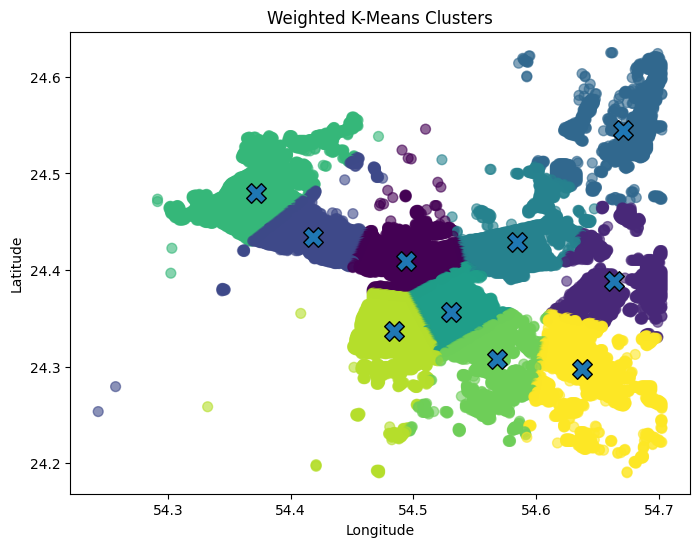

Interactive map written to point_cluster_map.html
         lat        lng  cluster
0  24.625000  54.660833        3
1  24.625000  54.661666        3
2  24.625000  54.662500        3
3  24.624167  54.699166        3
4  24.621667  54.594166        3
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_15


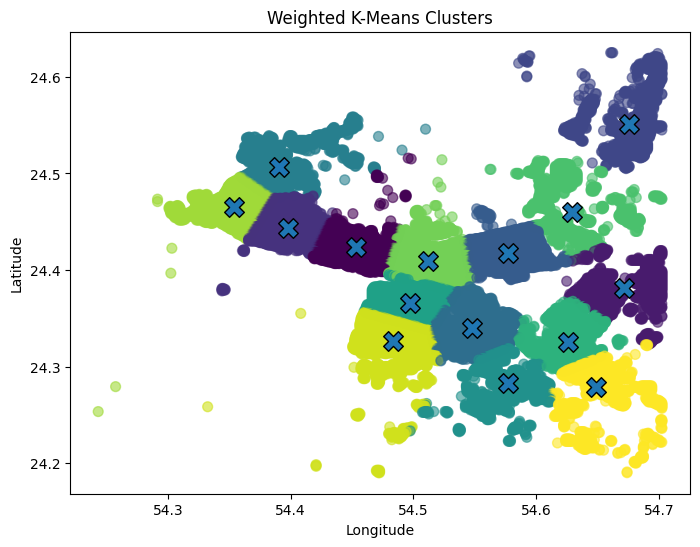

Interactive map written to point_cluster_map.html
         lat        lng  cluster
0  24.625000  54.660833        3
1  24.625000  54.661666        3
2  24.625000  54.662500        3
3  24.624167  54.699166        3
4  24.621667  54.594166        3
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_20


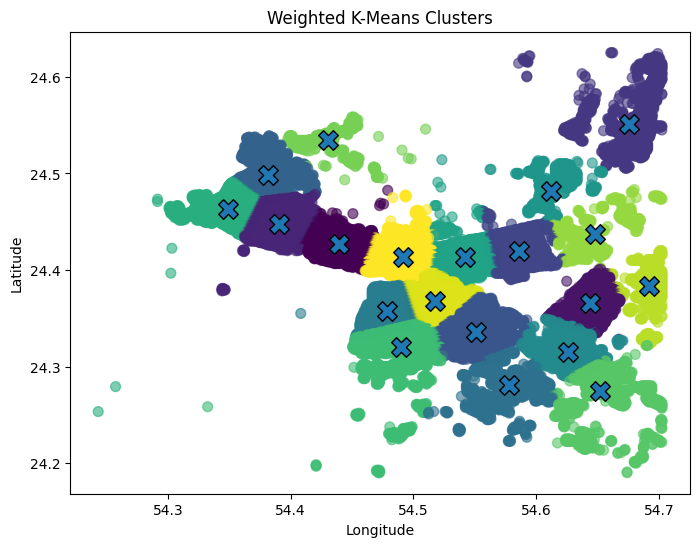

Interactive map written to point_cluster_map.html
         lat        lng  cluster
0  24.625000  54.660833       20
1  24.625000  54.661666       20
2  24.625000  54.662500       20
3  24.624167  54.699166       20
4  24.621667  54.594166       20
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_25


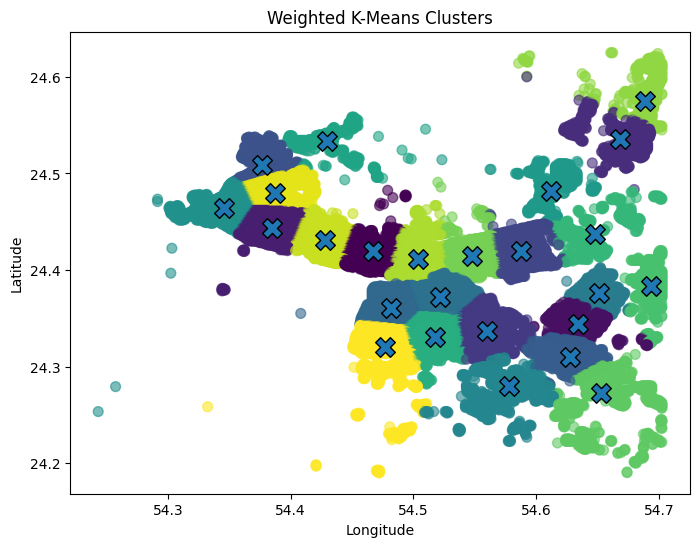

Interactive map written to point_cluster_map.html
         lat        lng  cluster
0  24.625000  54.660833       20
1  24.625000  54.661666       20
2  24.625000  54.662500       20
3  24.624167  54.699166       20
4  24.621667  54.594166       29
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_40


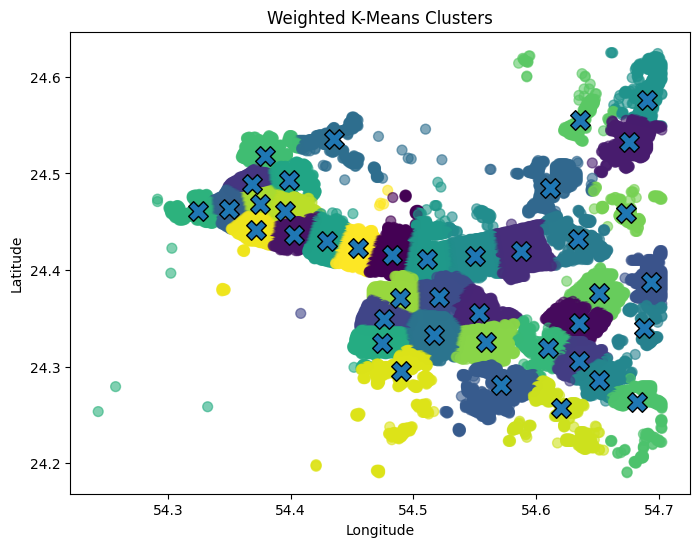

Interactive map written to point_cluster_map.html
         lat        lng  cluster
0  24.625000  54.660833       20
1  24.625000  54.661666       20
2  24.625000  54.662500       20
3  24.624167  54.699166       20
4  24.621667  54.594166       29
Files written to: /Users/epameinondasdouros/Personal/Quantum/Quantum_NYUAD_Hackathon/On_Site_Code/AI/Abu_Dhabi/abu_dhabi_50


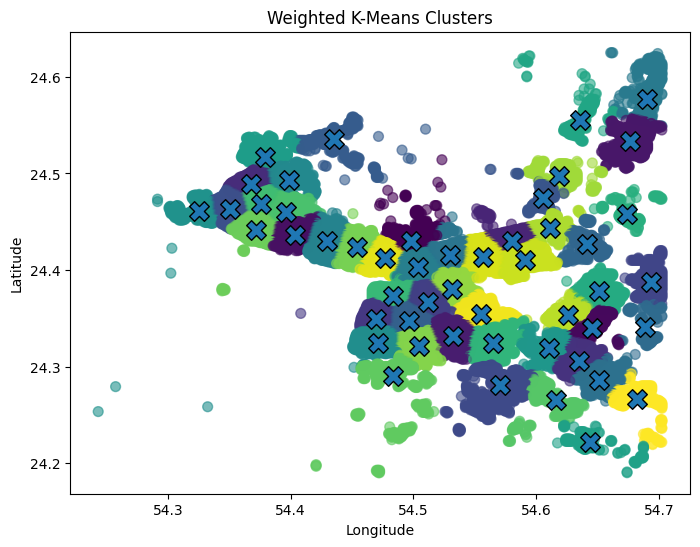

Interactive map written to point_cluster_map.html


In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

k_values=[10,15,20,25,40,50]

for k in k_values:
    X = df[['lat','lng']].values
    w=df['efficiency'].values

    kmeans_w = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_w.fit(X, sample_weight=w)         # pass your pop column here
    labels = kmeans_w.predict(X)             # or just use kmeans.labels_
    centers = kmeans_w.cluster_centers_

    # X[:,0]=lat, X[:,1]=lng
    labels = kmeans_w.labels_
    centers = kmeans_w.cluster_centers_

    df_final = pd.DataFrame(
        X,
        columns=['lat','lng']
    )
    df_final['cluster'] = labels

    print(df_final.head())

    folder = Path(f"Abu_Dhabi/abu_dhabi_{k}")   # e.g. dubai_50
    folder.mkdir(parents=True, exist_ok=True)

    df_final.to_csv(folder / "clusters.csv", index=False)

    centers_df = pd.DataFrame(centers, columns=["lat_center", "lng_center"])
    centers_df.to_csv(folder / "centers.csv", index=False)

    print(f"Files written to: {folder.resolve()}")

    import matplotlib.pyplot as plt

    # X[:,0]=lat, X[:,1]=lng
    labels = kmeans_w.labels_
    centers = kmeans_w.cluster_centers_

    plt.figure(figsize=(8,6))
    # plot each point colored by its cluster
    plt.scatter(
        X[:,1], X[:,0],
        c=labels,
        s=50,
        alpha=0.6
    )
    # mark cluster centers
    plt.scatter(
        centers[:,1], centers[:,0],
        marker='X',
        s=200,
        edgecolor='black'
    )

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Weighted K-Means Clusters')
    plt.show()

    m = folium.Map(
        location=[df['lat'].mean(), df['lng'].mean()],
        zoom_start=10
    )

    marker_cluster = MarkerCluster().add_to(m)

    for idx, point in df_final.iterrows():
        c = int(point['cluster'])
        folium.Circle(
            location=(point['lat'], point['lng']),
            radius=1,
            color=colors[c % len(colors)],
            fill=True
        ).add_to(m)

    for i in range(centers.shape[0]):
        # try both possible column names
        lat = centers[i][0]
        lng = centers[i][1]
        # build popup text
        popup = f"Center {idx}"
        folium.Marker(
            location=(lat, lng),
            icon=folium.Icon(color='black', icon='info-sign'),
            popup=popup
        ).add_to(m)

    # 6️⃣ Save to HTML
    m.save(f'weather_abu_dhabi_{k}.html')
    print("Interactive map written to point_cluster_map.html")


In [32]:
df_final = pd.DataFrame(
    X,
    columns=['lat','lng']
)
df_final['cluster'] = labels

print(df_final.head())

         lat        lng  cluster
0  24.625833  54.700833        3
1  24.625833  54.701666        3
2  24.625833  54.702500        3
3  24.625000  54.660833        3
4  24.625000  54.661666        3
